In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cmocean
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#import matplotlib.animation as animation
#from IPython.display import HTML

from pybarsim import BarSim2D
from pybarsim.pybarsim import _sub_zero_extremity
plt.rcParams.update({'font.size': 30})

# Définition du temps (Yr)


In [4]:
t_run=150000

# Definition du niveau marin au cours du temps en m

In [5]:
sea_level_curve = np.array([
    (0., -61.),
    (18000., -26.),
    (31000., -59.),
    (39000., -11.),
    (54000., -14.),
    (61000., -24.),
    (77000., -52.),
    (103000., -9.),
    (t_run, -11.),
])

# Définition de l'apport en sédiment en m$^2$/yr

In [6]:
sediment_supply_curve = np.array([
    (0., 7.),
    (29000., 8.),
    (34000., 15.),
    (52000., 21.),
    (63000., 19.),
    (71000., 12.),
    (105000., 4.),
    (111000., 3.),
    (t_run, 8.),
])

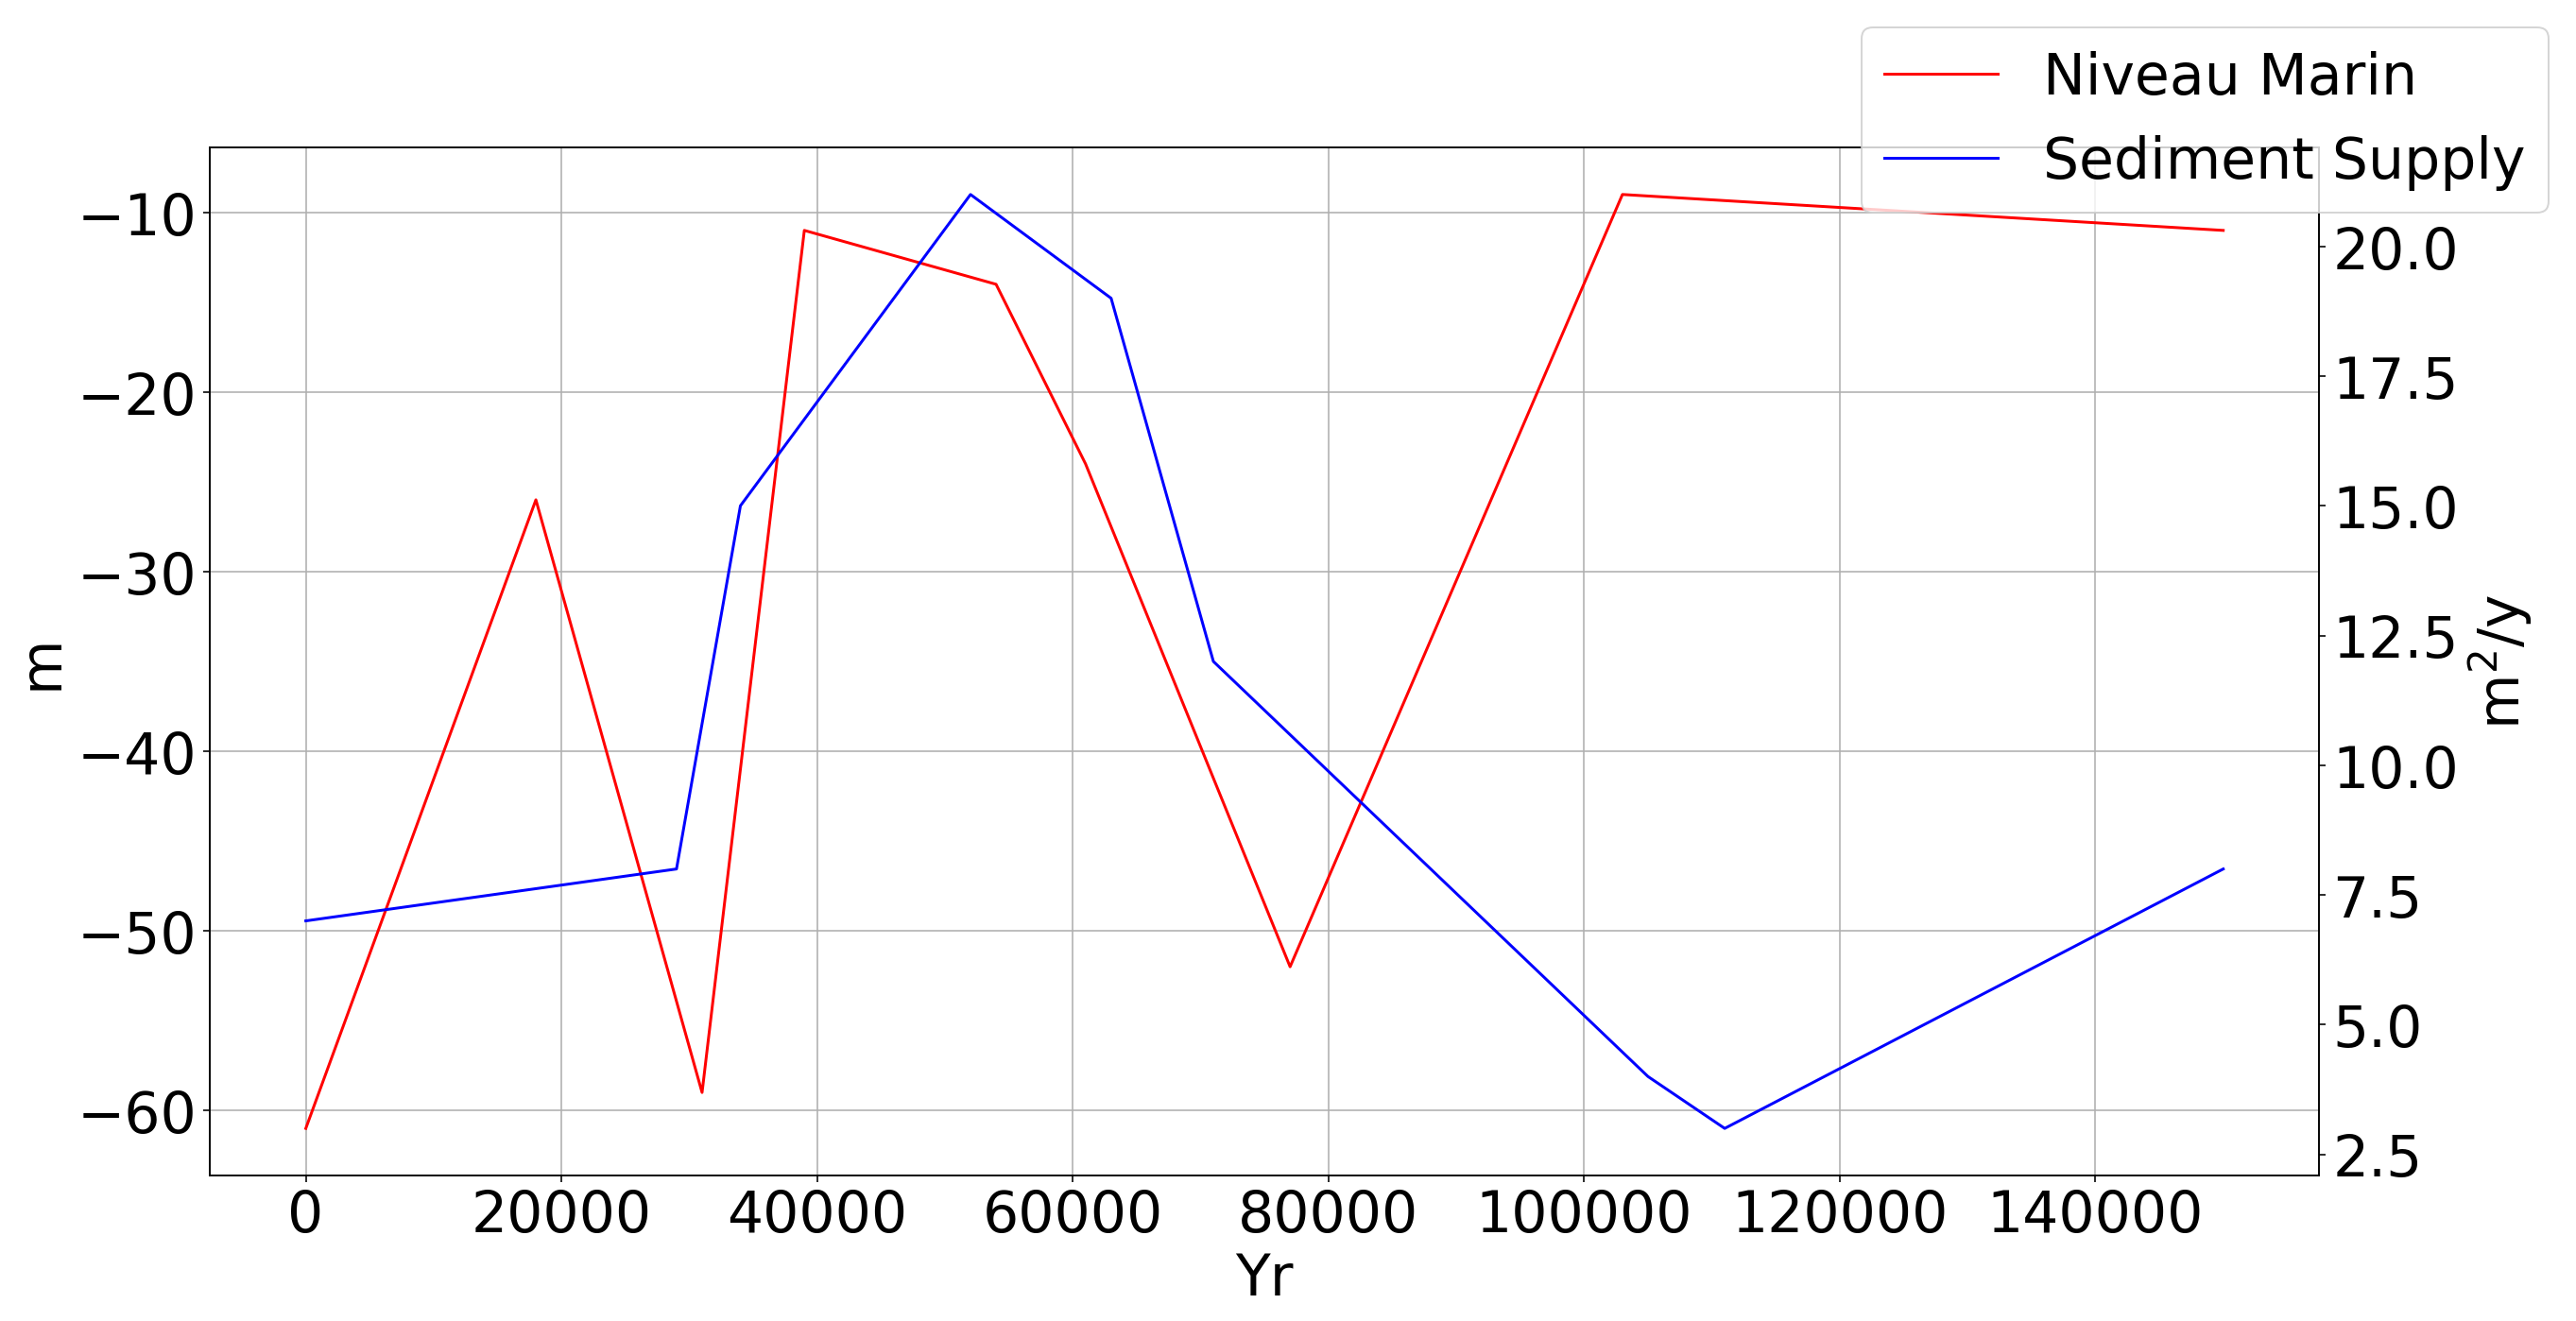

In [7]:
figi,ax=plt.subplots(1,1,figsize=(20,10))
ax.plot(sea_level_curve[:,0],sea_level_curve[:,1],'r',label='Niveau Marin')
ax2=ax.twinx()
ax2.plot(sediment_supply_curve[:,0],sediment_supply_curve[:,1],'b',label='Sediment Supply')
ax2.set_ylabel(r'm$^2$/y')
ax.set_ylabel(r'm')
ax.grid()
ax.set_xlabel('Yr')
figi.legend()

In [8]:
barsim = BarSim2D(np.linspace(0., -120., 300),
                  sea_level_curve,
                  sediment_supply_curve,
                  spacing=150.,
                  max_wave_height_fair_weather=1.5,
                  allow_storms=False,
                  sediment_size=(5., 50., 125., 250.),
                  sediment_fraction=(0.2, 0.3, 0.3, 0.2),
                  initial_substratum=(100., (0.2, 0.3, 0.3, 0.2)),
                  seed=42)
barsim.run(150000., dt_fair_weather=10.)
barsim.finalize()
barsim.subsample(20)
barsim.finalize(on='subsequence');
water_depth = barsim.sequence_['Sea level'] - barsim.sequence_['Elevation']
barsim.sequence_['Water depth'] = water_depth.where(water_depth > 0., 0.)

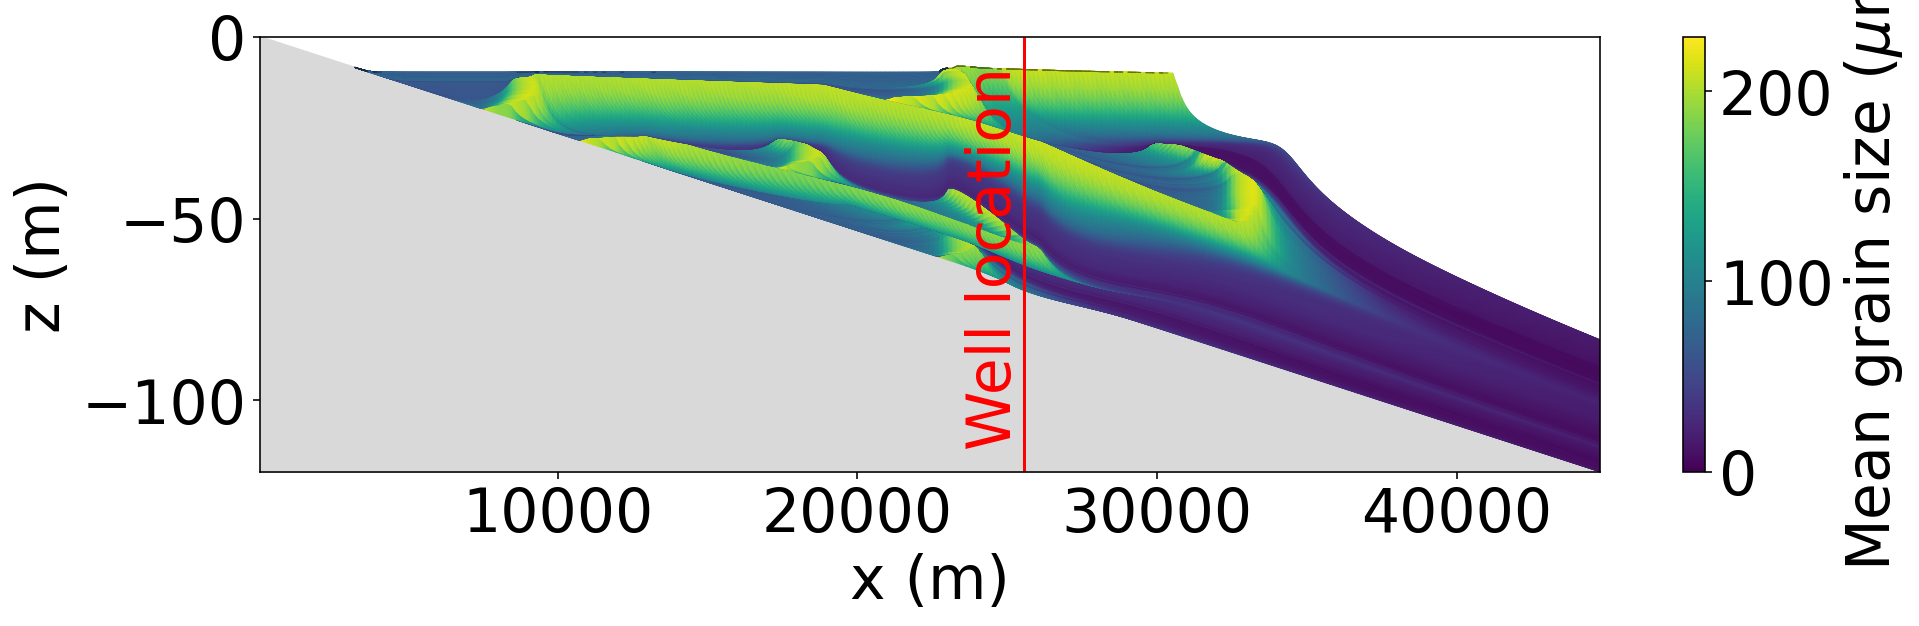

In [9]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.fill_between(barsim.subsequence_['X'][:-1],
                barsim.subsequence_['Horizons'][0, :-1],
                barsim.subsequence_['Horizons'][0, :-1].min(),
                color='#d9d9d9')
c = barsim.plot_subsequence(ax, var='Mean grain size')
fig.colorbar(c[0], ax=ax, label=r'Mean grain size ($\mu$m)')
ax.axvline(barsim.subsequence_['X'][170], c='red')
ax.text(barsim.subsequence_['X'][170], -110, 'Well location', ha='right', rotation=90, c='red')
ax.set(xlabel='x (m)', ylabel='z (m)');

In [10]:
water_depth = barsim.subsequence_['Sea level'] - barsim.subsequence_['Elevation']
barsim.subsequence_['Water depth'] = water_depth.where(water_depth > 0., 0.)

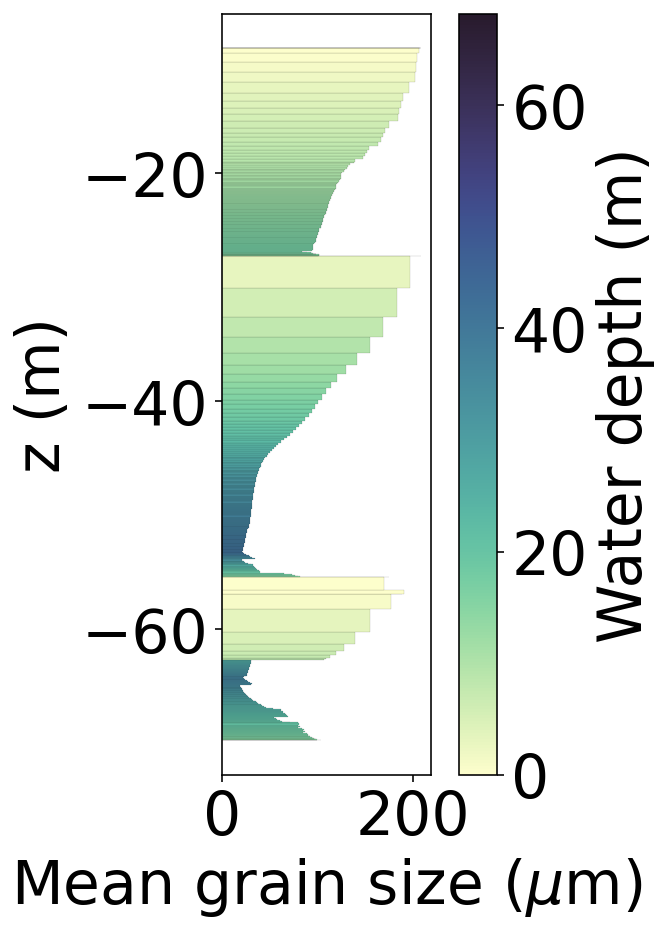

In [11]:
fig, ax = plt.subplots(figsize=(2.5, 7))
p, sm = barsim.plot_well(ax, 170, on='subsequence', var='Water depth', cmap=cmocean.cm.deep,
                         linewidth=0.05, edgecolor='k')
fig.colorbar(sm, ax=ax, pad=0.1, label='Water depth (m)')
ax.set(xlabel=r'Mean grain size ($\mu$m)', ylabel='z (m)');